<a href="https://colab.research.google.com/github/khoabom02/AI_Basic/blob/main/Midterm_Report/Members_of_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [ ]:
## Data using for trainning
folder = '/content/drive/MyDrive/Data_train_AI/data_train/Face/Face_Class/'
photos_train, labels_train = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('Hoang'):
    output=1.0
  if file.startswith('VinhTrong'):
    output=2.0
  if file.startswith('Hieu'):
    output=3.0
  if file.startswith('HaKiet'):
    output=4.0
  if file.startswith('HuuLong'):
    output=5.0
  if file.startswith('QuangPhuc'):
    output=6.0
  if file.startswith('Thai'):
    output=7.0
  if file.startswith('HoaiPhong'):
    output=8.0
  if file.startswith('Minh'):
    output=9.0
  if file.startswith('TuanKiet'):
    output=10.0
  if file.startswith('Kiet'):
    output=11.0
  if file.startswith('DangKhoa'):
    output=12.0
  if file.startswith('Phat'):
    output=13.0
  if file.startswith('SonTung'):
    output=14.0
  if file.startswith('TanThinh'):
    output=15.0
  if file.startswith('Thanh'):
    output=16.0
  if file.startswith('PhucDung'):
    output=17.0
  if file.startswith('KyAnh'):
    output=18.0
  if file.startswith('Thang'):
    output=19.0
  if file.startswith('LeDangKhoa'):
    output=20.0
  photo = load_img(folder + file, target_size = (30,40))
  photo = img_to_array(photo)
  photos_train.append(photo)
  labels_train.append(output)
photos_train = asarray(photos_train)
labels_train = asarray(labels_train)
print(photos_train.shape, labels_train.shape)
save('/content/drive/MyDrive/Data_train_AI/data_train/Face/Face_Train/Face_train_photos.npy',photos_train)
save('/content/drive/MyDrive/Data_train_AI/data_train/Face/Face_Train/Face_train_labels.npy',labels_train)

(1030, 30, 40, 3) (1030,)


In [ ]:
## Data using for testing
folder_test = '/content/drive/MyDrive/Data_train_AI/data_train/Face/Face_Class/'
photos_test, labels_test = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('Hoang'):
    output=1.0
  if file.startswith('VinhTrong'):
    output=2.0
  if file.startswith('Hieu'):
    output=3.0
  if file.startswith('HaKiet'):
    output=4.0
  if file.startswith('HuuLong'):
    output=5.0
  if file.startswith('QuangPhuc'):
    output=6.0
  if file.startswith('Thai'):
    output=7.0
  if file.startswith('HoaiPhong'):
    output=8.0
  if file.startswith('Minh'):
    output=9.0
  if file.startswith('TuanKiet'):
    output=10.0
  if file.startswith('Kiet'):
    output=11.0
  if file.startswith('DangKhoa'):
    output=12.0
  if file.startswith('Phat'):
    output=13.0
  if file.startswith('SonTung'):
    output=14.0
  if file.startswith('TanThinh'):
    output=15.0
  if file.startswith('Thanh'):
    output=16.0
  if file.startswith('PhucDung'):
    output=17.0
  if file.startswith('KyAnh'):
    output=18.0
  if file.startswith('Thang'):
    output=19.0
  if file.startswith('LeDangKhoa'):
    output=20.0
  photo_t = load_img(folder_test + file, target_size = (30,40))
  photo_t = img_to_array(photo_t)
  photos_test.append(photo_t)
  labels_test.append(output)
photos_test = asarray(photos_test)
labels_test = asarray(labels_test)
print(photos_test.shape, labels_test.shape)
save('/content/drive/MyDrive/Data_train_AI/data_train/Face/Face_Test/Face_test_photos.npy',photos_test)
save('/content/drive/MyDrive/Data_train_AI/data_train/Face/Face_Test/Face_test_labels.npy',labels_test)

(1030, 30, 40, 3) (1030,)


In [ ]:
## Convert to Gray Image
photos_train = photos_train.astype('float')/255.0
photos_test = photos_test.astype('float')/255.0

In [ ]:
## One hot encoding
from keras.utils import to_categorical 
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)
print(labels_train.shape)
print(labels_test.shape)

(1030, 21)
(1030, 21)


In [ ]:
from keras import models
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, Normalization, MaxPooling2D
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
#-------------------------------------#
batch_size = 64
epochs = 50
classes = 21

In [ ]:
# Split data into train and test sets
split_index = int(0.1 * len(photos_train))
test_x, test_y = photos_train[:split_index], labels_train[:split_index]
train_x, train_y = photos_train[split_index:], labels_train[split_index:]

In [ ]:
## Create CNN model
model=Sequential()
## Convolution
model.add(Conv2D(32, kernel_size=(3,3), activation='linear',input_shape=(30,40,3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#----------------------------------------------#
model.add(Conv2D(64,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#----------------------------------------------#
model.add(Conv2D(128,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

In [ ]:
## Fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(21, activation= 'softmax'))

In [ ]:
## Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                  

In [ ]:
# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True)
datagen.fit(train_x)

In [ ]:
## Train model
train = model.fit(photos_train, labels_train, batch_size, epochs=epochs, verbose=1,validation_data=(test_x, test_y))
# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)
print('Loss:', test_loss)

Epoch 1/50
17/17 [==============================] - 9s 40ms/step - loss: 2.9653 - accuracy: 0.1010 - val_loss: 3.2327 - val_accuracy: 0.0000e+00
Epoch 2/50
17/17 [==============================] - 0s 9ms/step - loss: 2.0454 - accuracy: 0.4136 - val_loss: 2.7320 - val_accuracy: 0.0680
Epoch 3/50
17/17 [==============================] - 0s 8ms/step - loss: 0.8094 - accuracy: 0.7476 - val_loss: 0.9097 - val_accuracy: 0.6796
Epoch 4/50
17/17 [==============================] - 0s 9ms/step - loss: 0.3216 - accuracy: 0.9000 - val_loss: 0.2731 - val_accuracy: 0.9709
Epoch 5/50
17/17 [==============================] - 0s 8ms/step - loss: 0.1460 - accuracy: 0.9515 - val_loss: 0.0517 - val_accuracy: 0.9903
Epoch 6/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0649 - accuracy: 0.9796 - val_loss: 0.0308 - val_accuracy: 0.9903
Epoch 7/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0362 - accuracy: 0.9903 - val_loss: 0.0258 - val_accuracy: 0.9903
Epoch 8/50
17/1

In [ ]:
## Save Model
model.save('/content/drive/MyDrive/Data_train_AI/data_train/Face/model_face.h5')

<ipython-input-26-d164d1ce7a5b>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='red')


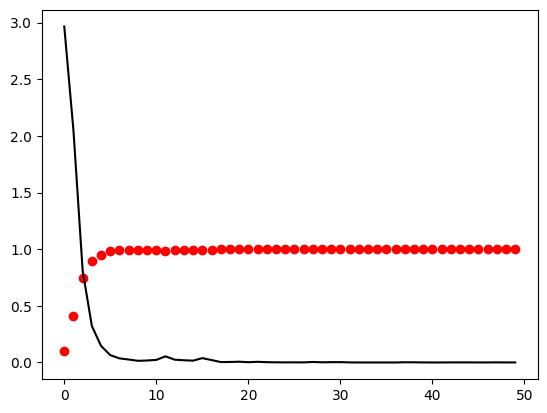

In [ ]:
## Evaluate the accuracy
accuracy =train.history['accuracy']
loss = train.history['loss']
epochs=range(len(accuracy))
## Graphing
import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='red')
plt.plot(epochs,loss , 'k', label ='Training loss')
plt.show()

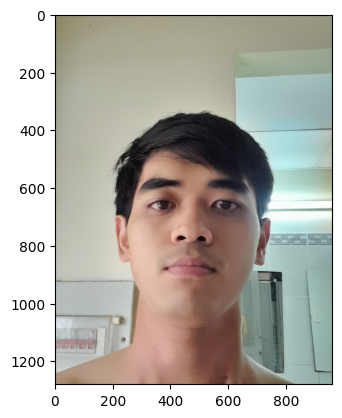

In [ ]:
## Show image
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
url = 'LeDangKhoa_Test.jpg'
img = load_img(url)
imshow(img)

1/1 [==============================] - 0s 270ms/step
Predicted:  LeDangKhoa


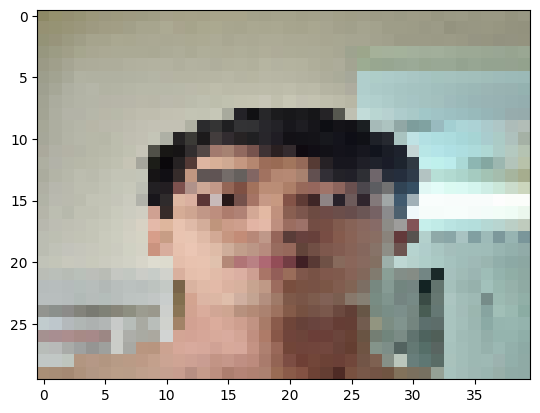

In [ ]:
## Test
name={1:'Hoang', 2:'Hieu',3:'VinhTrong' ,4:'HuuLong' ,5:'QuangPhuc',6:'HaKiet',
7:'HuuLong', 8:'QuangPhuc', 9:'Thai', 10:'HoaiPhong', 11:'Minh', 12:'TuanKiet', 
13:'Kiet', 14:'DangKhoa',15:'Phat', 16:'SonTung', 17:'TanThinh', 18:'Thang', 19:'PhucDung',20:'LeDangKhoa'}
Test_img = load_img(url, target_size = (30,40))
imshow(img)
## Test
import numpy as np
arrayImage = img_to_array(Test_img).reshape(1,30,40,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", name[pred])
plt.imshow(Test_img)